# Statistics about tokens

In [5]:
import pickle
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

### The distrubution of terminal token



#### 1. Variety of terminal token

In [8]:
num_terminal_counter = pickle.load(open('terminal_num_counter.pkl', 'rb'))
total_tt_token = len(num_terminal_counter)
out_of_bag = num_terminal_counter.most_common()[30000:]

In [7]:
print('There are {} kinds of terminal token in dataset'.format(total_tt_token))
print('Except the most frequent {} tokens，There are {} kinds of tokens out of bag'.format(30000, len(out_of_bag)))

There are 2579363 kinds of terminal token in dataset
Except the most frequent 30000 tokens，There are 2549363 kinds of tokens out of bag


#### Number of terminal token

In [9]:
num_of_out_of_bag_token = 0
for string, value in out_of_bag:
    num_of_out_of_bag_token += value
num_of_total_token = sum(num_terminal_counter.values())

print('There are {} terminal tokens in dataset'.format(num_of_total_token))
print('There are {} tokens are out of bag'.format(num_of_out_of_bag_token))
print('Percentage of out of bag token: {:.4f}'.format(num_of_out_of_bag_token / num_of_total_token))

There are 82839666 terminal tokens in  dataset
There are 14155397 tokens are out of bag
Percentage of out of bag token: 0.1709


#### Conclusion
1. **There are many kinds of terminal token are out of bag.**
2. **There are 17% terminal tokens are out of bag**

### Statistics about type: "Identifier"

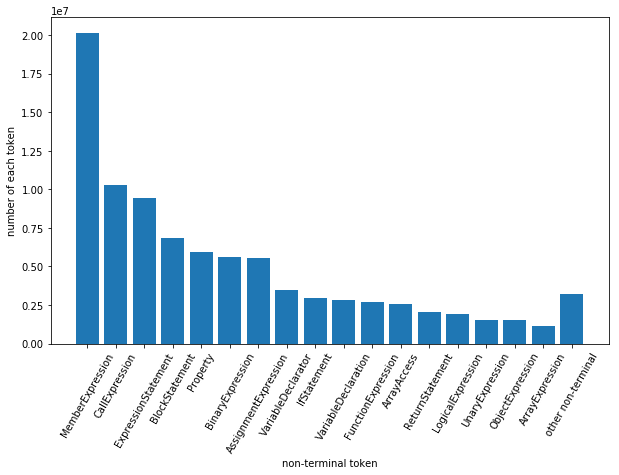

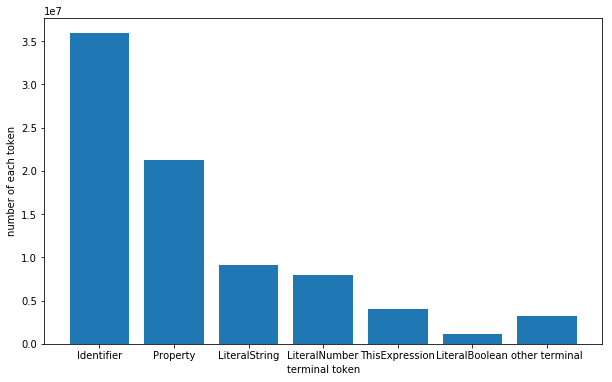

In [12]:
def show_token_statistic(nt_clip=17, tt_clip=6):
    nt_counter, tt_counter = pickle.load(open('count_statistic.pkl', 'rb'))
    temp_nt_x = [k for k, v in nt_counter.most_common()]
    temp_nt_y = [v for k, v in nt_counter.most_common()]
    nt_x = temp_nt_x[:nt_clip]
    nt_y = temp_nt_y[:nt_clip]
    other_non_terminal = 0
    for i in range(nt_clip, len(temp_nt_y)):
        other_non_terminal += temp_nt_y[i]
    nt_x.append('other non-terminal')
    nt_y.append(other_non_terminal)

    temp_tt_x = [k for k, v in tt_counter.most_common()]
    temp_tt_y = [v for k, v in tt_counter.most_common()]
    tt_x = temp_tt_x[:tt_clip]
    tt_y = temp_tt_y[:tt_clip]
    other_terminal = 0
    for i in range(tt_clip, len(temp_tt_y)):
        other_terminal += temp_tt_y[i]
    tt_x.append('other terminal')
    tt_y.append(other_terminal)

    plt.figure(figsize=(10, 6))
    plt.bar(nt_x, nt_y)
    plt.xticks(rotation=60)
    plt.xlabel('non-terminal token')
    plt.ylabel('number of each token')

    plt.figure(figsize=(10, 6))
    plt.bar(tt_x, tt_y)
    plt.xlabel('terminal token')
    plt.ylabel('number of each token')
    plt.show()
show_token_statistic()

In [10]:
def get_persent_of_identifier():
    nt_counter, tt_counter = pickle.load(open('count_statistic.pkl', 'rb'))
    tt_x = [k for k, v in tt_counter.most_common()]
    tt_y = [v for k, v in tt_counter.most_common()]
    num_of_identifier = tt_y[0]
    del tt_y[0]
    other_num_of_tt_token = 0
    for num in tt_y:
        other_num_of_tt_token += num
    print('There are :', num_of_identifier, ' Identifiers in dataset')
#    print('其它terminal token的总数量：', other_num_of_tt_token)
    percentage = num_of_identifier / (other_num_of_tt_token+num_of_identifier)
    print('The percentage of identifier in all terminal token的 is:', percentage*100, '%')
    return percentage
get_persent_of_identifier()

一共有: 35936943 个 Identifier在数据集中
其它terminal token的总数量： 46902723
identifier 占所有terminal token的比例: 0.43381322903933484


0.43381322903933484

#### Conclusion
1. There are 43% terminal tokens are Identifier，in a IDE, prediction for next variable is one of the most useful approach for code completion，**So, prediction of Identifier is important and useful**

### Statistics about 'Identifier' after variables renaming

In [13]:
rename_terminal_counter = pickle.load(open('js_dataset/rename_variable/terminal_counter.pkl', 'rb'))[0]

In [14]:
num_terminal_counter = pickle.load(open('terminal_num_counter.pkl', 'rb'))

In [8]:
print('There are {} kinds of terminal node after renaming'.format(len(rename_terminal_counter)))

There are 1918131 kinds of terminal node after renaming


In [93]:
def count_identifier(counter):
    id_counter = 0
    for a in counter.items():
        string = a[0]
        type_info = string.split('=$$=')[0]
        if type_info == 'Identifier':
            id_counter+=1
    return id_counter

In [94]:
num_rename_identifier = count_identifier(rename_terminal_counter)
num_identifier = count_identifier(num_terminal_counter)
print('There are {} identifier before rename'.format(num_identifier))
print('There are {} renamed identifier'.format(num_rename_identifier))

一共有 473227 种 identifier before rename
一共有 8150 种 renamed identifier


In [35]:
def count_string(counter):
    string_counter = 0
    appearance_time = []
    for a in counter.items():
        string = a[0]
        split_info = string.split('=$$=')
        type_info = split_info[0]
        if type_info == 'LiteralString':
            string_counter+=1
            appearance_time.append((string, a[1]))
    return string_counter, appearance_time

In [36]:
a, b = count_string(rename_terminal_counter)

In [40]:
b = sorted(b, key=lambda x:x[1], reverse=True)

In [41]:
b[:10]

[('LiteralString=$$=', 705980),
 ('LiteralString=$$=string', 188854),
 ('LiteralString=$$= ', 172630),
 ('LiteralString=$$=undefined', 123384),
 ('LiteralString=$$=function', 117502),
 ('LiteralString=$$=object', 99038),
 ('LiteralString=$$=.', 91196),
 ('LiteralString=$$=y', 72474),
 ('LiteralString=$$=/', 67902),
 ('LiteralString=$$=use strict', 67442)]

## test 使用t-SNE对手写数字进行降维可视化

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE


def get_data():
    digits = datasets.load_digits(n_class=6)
    data = digits.data
    label = digits.target
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features


In [2]:
def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [3]:
def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    result = tsne.fit_transform(data)
    fig = plot_embedding(result, label,
                         't-SNE embedding of the digits (time %.2fs)'
                         % (time() - t0))
    plt.show(fig)

Computing t-SNE embedding


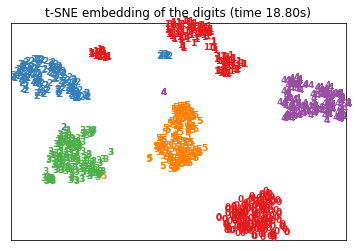

In [4]:
main()

## 测试区域

In [80]:
terminal_cc = Counter()
def rename_variable(ast):
    """将terminal token中的variable rename成统一的arg1， arg2的形式，大大减少variable的种类"""
    rename_map = {}
    for node in ast:
        if node == 0:
            break
        if ('children' not in node.keys() or len(node['children']) == 0) and node['type'] == 'Identifier':
            terminal_value = node['value']
            if terminal_value in rename_map.keys():
                node['value'] = rename_map[terminal_value]
            else:
                order_value = 'arg' + str(len(rename_map.keys()) + 1)
                node['value'] = order_value
                rename_map[terminal_value] = order_value
            string_rep = str(node['type']) + '=$$=' + str(node['value'])
            terminal_cc[string_rep] += 1
    return ast

In [84]:
import examples
a = examples.ast_example.copy()
b = examples.ast_example.copy()

In [86]:
import random
for node in a:
    if node == 0:
        break
    node['type'] = 'Identifier'
    node['value'] = random.randint(1, 5)
for node in b:
    if node == 0:
        break
    node['type'] = 'Identifier'
    node['value'] = random.randint(6, 10)